# **Jamboree Education!**
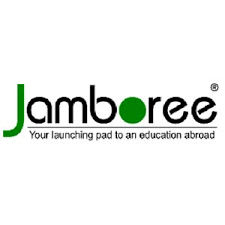

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Jamboree_Admission.csv")

Observations on shape of data, data types of all the attributes, conversion of
categorical attributes to 'category' (If required), missing value detection,
statistical summary.


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.shape

(500, 9)

 Univariate Analysis (distribution plots of all the continuous variable(s)barplots/countplots of all the categorical variables

In [7]:
df.drop(columns= 'Serial No.', inplace= True)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

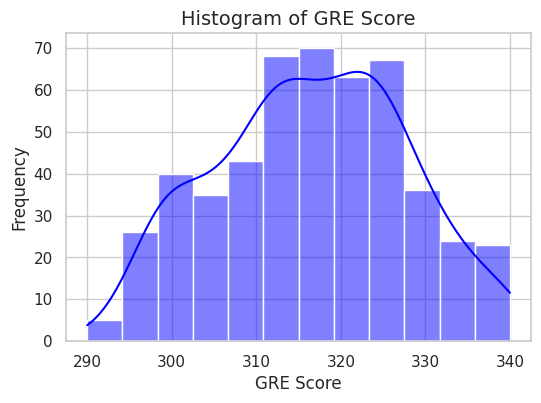

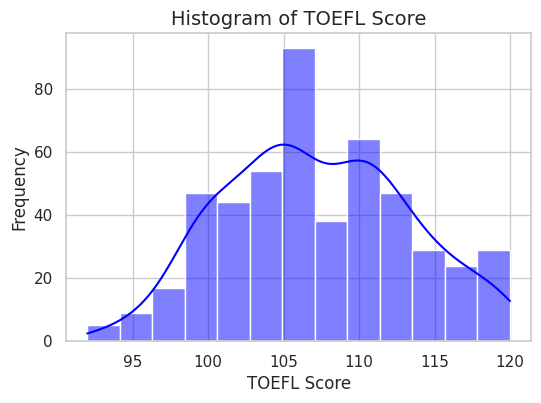

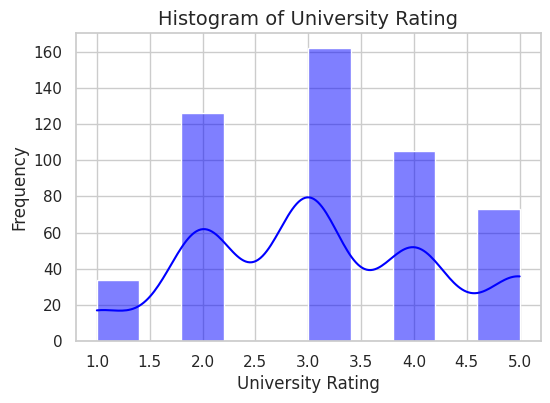

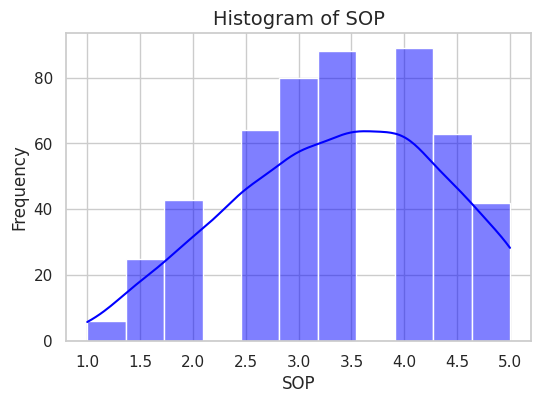

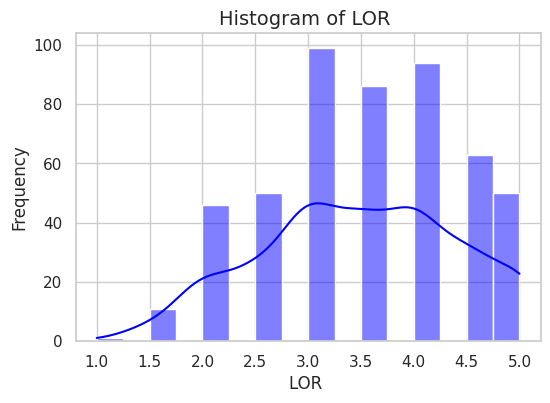

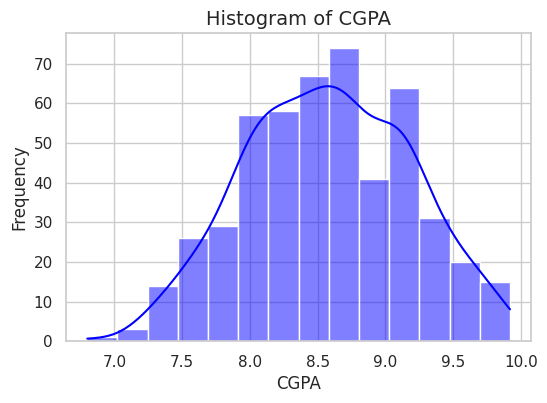

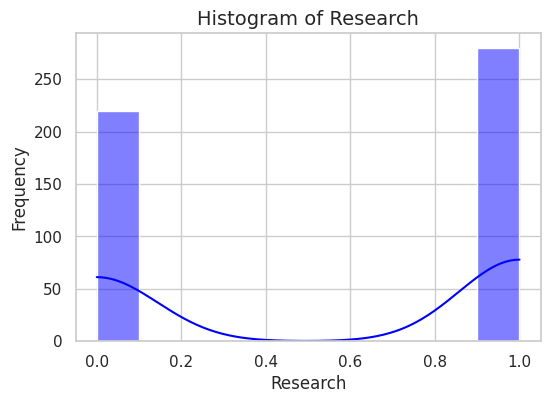

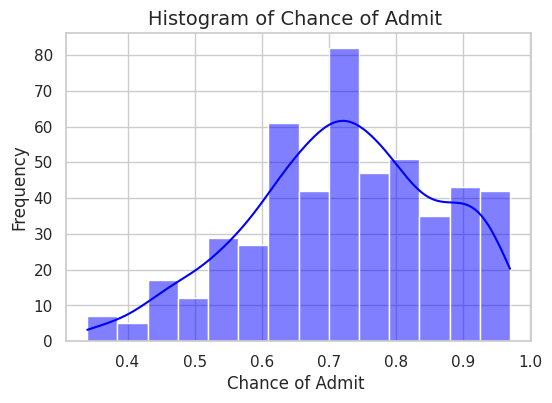

In [9]:
sns.set(style="whitegrid")
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

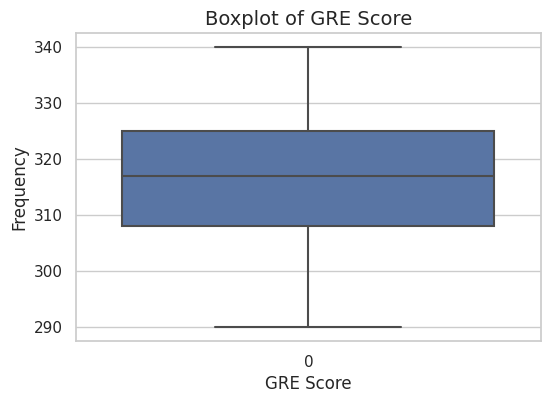

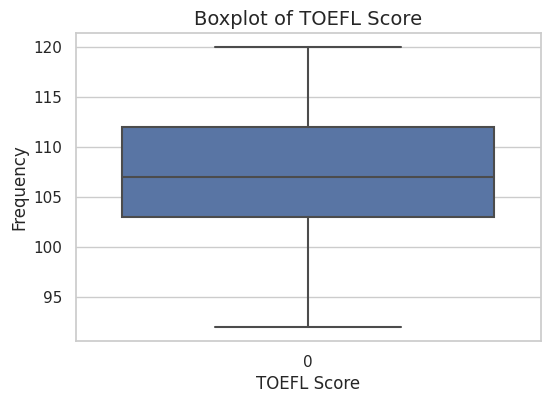

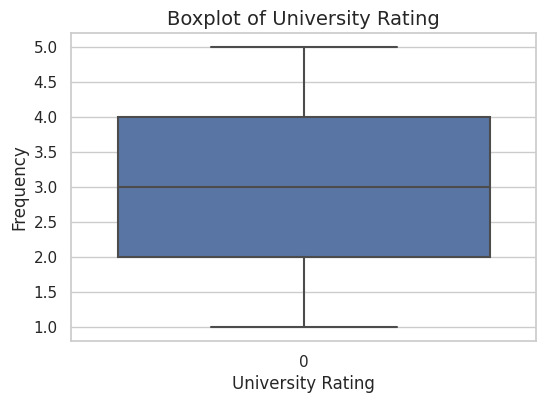

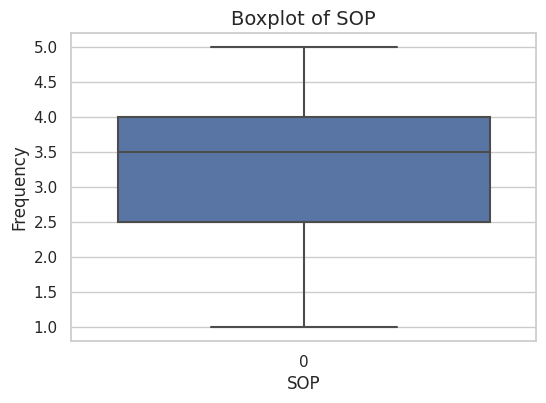

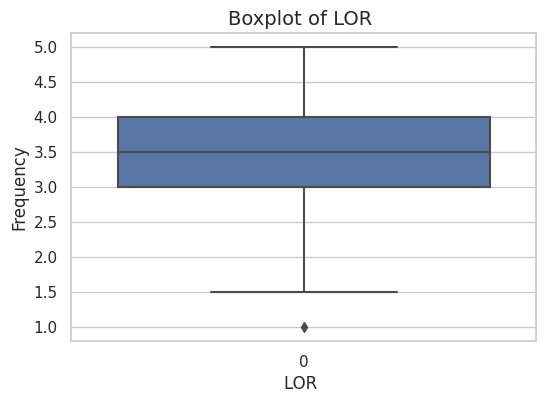

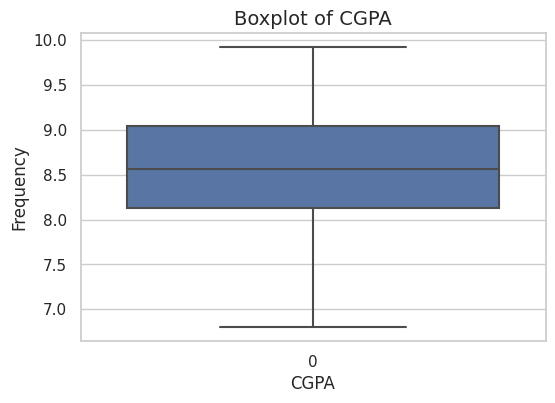

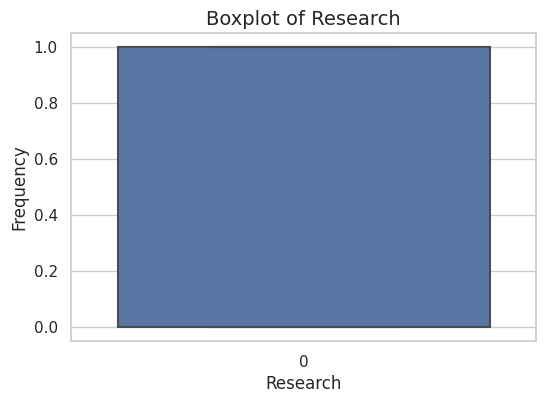

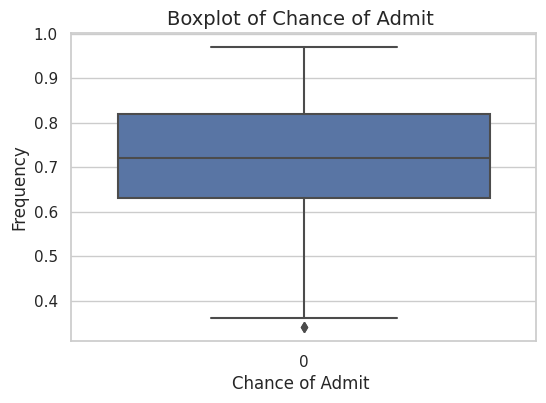

In [10]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

outliers found in LOR and ADMIT columns

Bivariate Analysis (Relationships between important variables


2.  Data Preprocessing (10 Points)
a. Duplicate value check
b. Missing value treatment
c. Outlier treatment
d. Feature engineering
e. Data preparation for modeling


In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
sc= ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
X= df.drop(columns='Chance of Admit ')
Y= df["Chance of Admit "]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X[sc]= scaler.fit_transform(X[sc])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model building :
a. Build the Linear Regression model and comment on the model statistics
b. Display model coefficients with column names

In [15]:
import statsmodels.api as sm
X_sm= sm.add_constant(X_train)
model= sm.OLS(Y_train, X_sm)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.33e-146
Time:                        04:01:35   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3450      0.01

Testing the assumptions of linear regression model (50 Points)
a. Multicollinearity check by VIF score (variables are dropped one-by-one till none
has VIF>5) (10 Points)
b. Mean of residuals is nearly zero (10 Points)
c. Linearity of variables (no pattern in residual plot) (10 Points)
d. Test for Homoscedasticity (10 Points)
e. Normality of residuals (almost bell-shaped curve in residuals distribution, points
in QQ plot are almost all on the line) (10 Points)


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif=pd.DataFrame()
vif["features"]= X_sm.columns
vif['VIF_score'] = [variance_inflation_factor(X_sm, i) for i in range(X_sm.shape[1])]
vif["VIF_score"]= round(vif["VIF_score"], 2)
vif.sort_values(by='VIF_score', ascending=False)

,features,VIF_score
0,const,11.94
6,CGPA,4.77
1,GRE Score,4.24
2,TOEFL Score,4.06
4,SOP,2.71
3,University Rating,2.59
5,LOR,1.98
7,Research,1.47


 Mean of residuals is nearly zero

# On Test data

In [44]:
X_test_sm= sm.add_constant(X_test)
Y_test_pred= result.predict(X_test_sm)
error_test= Y_test-Y_test_pred

In [27]:
error_test.mean()

-0.006100917484112264

# On train data(Mean of residuals)

In [35]:
Y_train_pred= result.predict(X_sm)
error_train= Y_train-Y_train_pred
error_train.mean()

-1.6597834218146091e-16

Linearity of variables (no pattern in residual plot)

<Axes: ylabel='Count'>

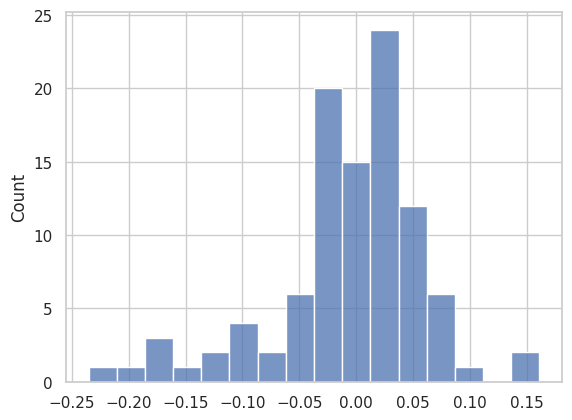

In [28]:
sns.histplot(error_test)

<Axes: ylabel='Count'>

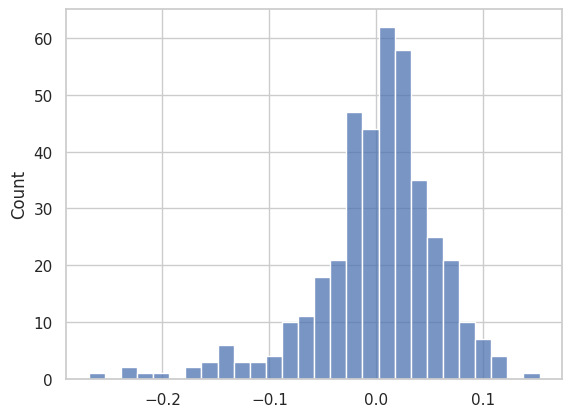

In [34]:
sns.histplot(error_train)

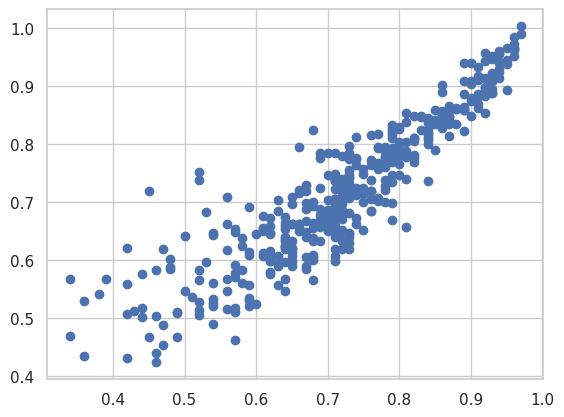

In [38]:
plt.scatter(Y_train, Y_train_pred)

<Axes: xlabel='Chance of Admit '>

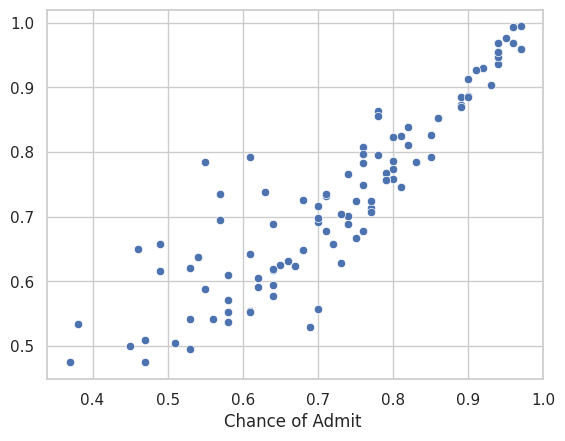

In [41]:
sns.scatterplot(x=Y_test, y=Y_test_pred)

Text(0.5, 1.0, 'Predicted values vs Residuals')

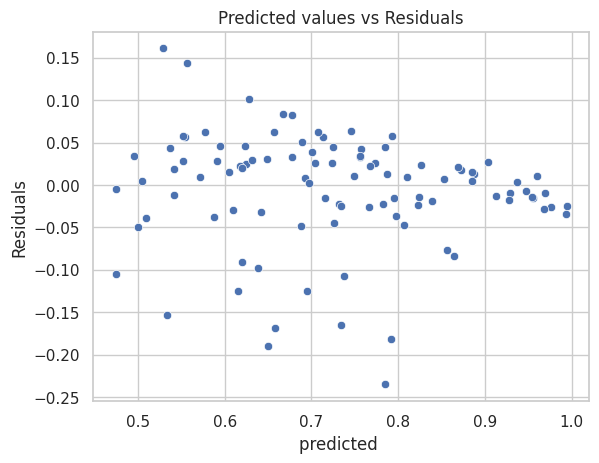

In [45]:
sns.scatterplot(x= Y_test_pred,y=error_test)
plt.xlabel("predicted ")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Q-Q plot (residuals on train data)

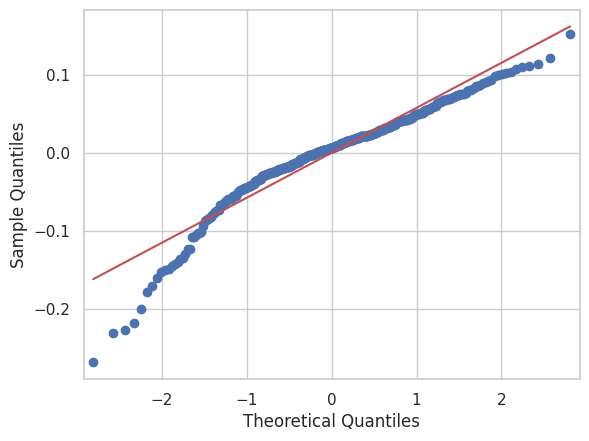

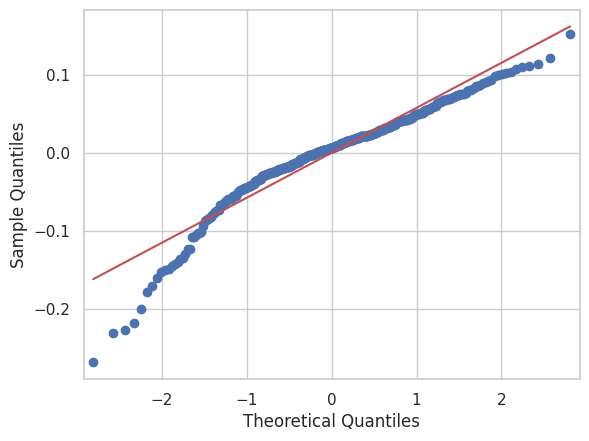

In [47]:
from statsmodels.graphics.gofplots import qqplot
qqplot( error_train, line='s')

Q-Q plot (residuals on test data)

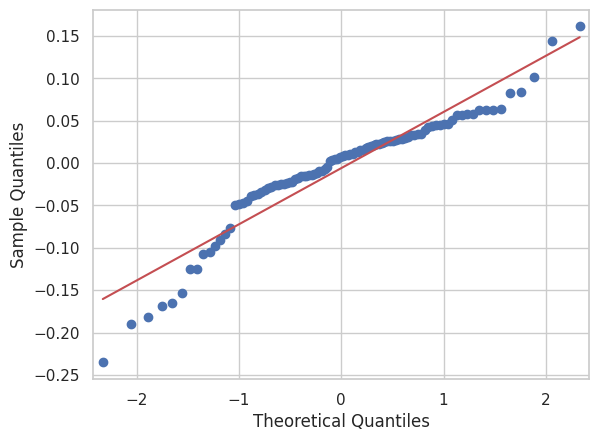

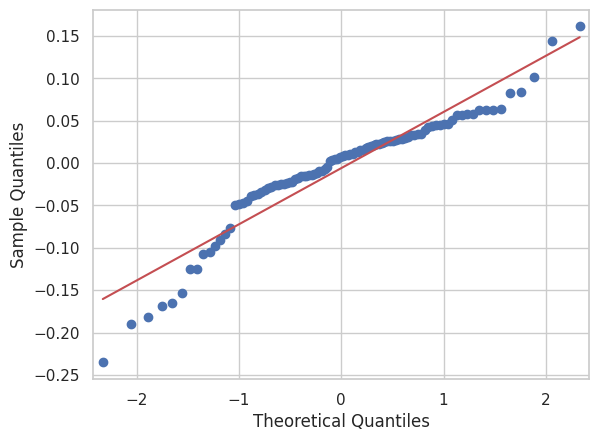

In [48]:
qqplot(error_test, line='s')

Test for Homoscedasticity

* Null Hypothesis: Heteroscedasticity is not present.
* Alternate Hypothesis: Heteroscedasticity is present.

In [46]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Y_train, X_sm)
lzip(name, test)

[('F statistic', 1.0772994279987238), ('p-value', 0.30323276479815664)]

# Model performance evaluation
* Metrics checked - MAE, RMSE, R2, Adj R2

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# For Test data

In [52]:
print("r2 score: ", r2_score(Y_test,Y_test_pred))
print("mean squared error: ", mean_squared_error(Y_test,Y_test_pred))
print("mean absolute error: ", mean_absolute_error(Y_test,Y_test_pred))

r2 score:  0.7927524897595928
mean squared error:  0.004429285498957571
mean absolute error:  0.04730057428620608


# Train data

In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.33e-146
Time:                        04:48:29   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3450      0.01

Based on significance level we can drop SOP and University rating

In [58]:
X_sm_SOP_Urating= X_sm.drop(columns=["SOP", "University Rating"])

In [63]:
model1= sm.OLS(Y_train, X_sm_SOP_Urating)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.65e-148
Time:                        04:58:07   Log-Likelihood:                 572.28
No. Observations:                 400   AIC:                            -1133.
Df Residuals:                     394   BIC:                            -1109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3425      0.010     34.923      

Metric values after dropping SOP and University rating

In [65]:
Y_pred_new= result1.predict(X_sm_SOP_Urating)
print("r2 score: ", r2_score(Y_train,Y_pred_new))
print("mean squared error: ", mean_squared_error(Y_train,Y_pred_new))
print("mean absolute error: ", mean_absolute_error(Y_train,Y_pred_new))

r2 score:  0.8283544154206002
mean squared error:  0.003348330647824238
mean absolute error:  0.04166067850716051


# Recommendations
*  Important features to increase chances of admit are a good CGPA, GRE, TOEFL score respectively
*  The model predicts with an accurancy of 82%
*  University rating and SOP are insignificant features